# HDB Resale Price Prediction

## Machine Learning Modelling

### Import Libraries

In [5]:
# General
import math
import random
random.seed(42)
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import randint

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import tree

# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler      # Remove Mean and scale to Unit Variance
from sklearn.preprocessing import PowerTransformer    # Log Transformation
from sklearn.preprocessing import OneHotEncoder

# Feature Engineering
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# import lightgbm as ltb
import catboost as cb

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [6]:
# Importing Data
data_hdb_cleaned = pd.read_csv('../dataset/hdb_last15_cleaned.csv')
data_hdb_cleaned.index += 1
data_hdb_cleaned

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,...,recreational_within_1km_average_rating,recreational_within_2km_count,recreational_within_2km_average_rating,education_within_1km_count,education_within_1km_average_rating,education_within_2km_count,education_within_2km_average_rating,postal_code,region,price_per_sqm
1,SEMBAWANG,5 ROOM,Premium Apartment,111.0,362000.0,2009-07-01,2001,01 TO 05,357A,91.000000,...,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357.0,North,3261.261261
2,SEMBAWANG,5 ROOM,Premium Apartment,110.0,370000.0,2009-08-01,2001,06 TO 10,357A,91.000000,...,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357.0,North,3363.636364
3,SEMBAWANG,5 ROOM,Premium Apartment,110.0,403000.0,2010-01-01,2001,16 TO 20,357A,90.000000,...,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357.0,North,3663.636364
4,SEMBAWANG,4 ROOM,Premium Apartment,95.0,350000.0,2010-07-01,2001,01 TO 05,357A,90.000000,...,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357.0,North,3684.210526
5,SEMBAWANG,4 ROOM,Premium Apartment,95.0,399000.0,2010-07-01,2001,10 TO 15,357A,90.000000,...,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357.0,North,4200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316854,BUKIT MERAH,5 ROOM,Improved,114.0,921000.0,2022-10-01,1974,10 TO 15,87,50.750000,...,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087.0,South,8078.947368
316855,BUKIT MERAH,5 ROOM,Improved,117.0,930000.0,2022-10-01,1974,01 TO 05,87,50.750000,...,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087.0,South,7948.717949
316856,BUKIT MERAH,5 ROOM,Improved,117.0,978000.0,2022-12-01,1974,10 TO 15,87,50.666667,...,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087.0,South,8358.974359
316857,BUKIT MERAH,5 ROOM,Improved,114.0,950000.0,2022-12-01,1974,21 TO 25,87,50.583333,...,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087.0,South,8333.333333


In [7]:
# Understanding Data I
data_hdb_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316858 entries, 1 to 316858
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   town                                    316858 non-null  object 
 1   flat_type                               316858 non-null  object 
 2   flat_model                              316858 non-null  object 
 3   floor_area_sqm                          316858 non-null  float64
 4   resale_price                            316858 non-null  float64
 5   month                                   316858 non-null  object 
 6   lease_commence_date                     316858 non-null  int64  
 7   storey_range                            316858 non-null  object 
 8   block                                   316858 non-null  object 
 9   remaining_lease                         316858 non-null  float64
 10  address                                 3168

In [8]:
# Understanding Data II
data_hdb_cleaned.describe()

,floor_area_sqm,resale_price,lease_commence_date,remaining_lease,lat,long,nearest_distance_to_mrt,avg_long,avg_lat,healthcare_within_1km_count,...,recreational_within_1km_count,recreational_within_1km_average_rating,recreational_within_2km_count,recreational_within_2km_average_rating,education_within_1km_count,education_within_1km_average_rating,education_within_2km_count,education_within_2km_average_rating,postal_code,price_per_sqm
count,316858.000000,3.168580e+05,316858.00000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,...,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316858.000000,316410.000000,316858.000000
mean,97.479359,4.412566e+05,1991.72968,75.267866,1.365842,103.838676,0.624044,103.838680,1.365844,5.988376,...,3.837429,3.928042,11.887855,4.055404,4.855336,4.037460,14.403837,4.095730,551205.063677,4581.617630
std,24.742062,1.467689e+05,11.84791,11.684112,0.042881,0.072799,0.378055,0.072687,0.042815,5.242842,...,3.054143,0.688451,8.638953,0.134527,2.244488,0.574591,4.698377,0.183904,186035.992530,1181.663412
min,31.000000,1.270000e+05,1966.00000,43.000000,1.270380,103.644248,0.023000,103.688247,1.272255,0.000000,...,0.000000,0.000000,2.000000,3.577778,0.000000,0.000000,2.000000,2.786667,50004.000000,1445.920000
25%,74.000000,3.360000e+05,1984.00000,66.000000,1.336264,103.774173,0.337000,103.774336,1.336320,3.000000,...,2.000000,3.933333,8.000000,3.983333,3.000000,3.975000,12.000000,3.994737,470709.000000,3798.076923
50%,97.000000,4.150000e+05,1989.00000,75.000000,1.362565,103.844027,0.552000,103.844611,1.362350,5.000000,...,3.000000,4.050000,10.000000,4.075000,5.000000,4.133333,14.000000,4.130000,560323.000000,4368.932039
75%,113.000000,5.150000e+05,2000.00000,85.000000,1.392710,103.898351,0.828000,103.898503,1.391577,8.000000,...,5.000000,4.150000,13.000000,4.136364,6.000000,4.266667,17.000000,4.205263,680518.000000,5074.626866
max,280.000000,1.418000e+06,2018.00000,94.916667,1.457071,103.964915,2.154000,103.962400,1.455540,61.000000,...,41.000000,4.700000,105.000000,4.380000,19.000000,5.000000,37.000000,4.500000,825195.000000,14731.182796


### Split Training & Testing Dataset

In [9]:
# Dependent Variable
target_list = ['resale_price']

# Independent Variables
feature_list = ['flat_type', 'floor_area_sqm', 'month', 'lease_commence_date', 'storey_range', 'remaining_lease',
                'nearest_distance_to_mrt', 'healthcare_within_1km_count', 'healthcare_within_1km_average_rating', 
                'healthcare_within_2km_count', 'healthcare_within_2km_average_rating', 'recreational_within_1km_count', 
                'recreational_within_1km_average_rating', 'recreational_within_2km_count', 'recreational_within_2km_average_rating', 
                'education_within_1km_count', 'education_within_1km_average_rating', 'education_within_2km_count',
                'education_within_2km_average_rating', 'region', 'price_per_sqm']

print(feature_list)

# Selecting Target Variable and Features from Dataset
X = data_hdb_cleaned[feature_list]
y = data_hdb_cleaned[target_list]

['flat_type', 'floor_area_sqm', 'month', 'lease_commence_date', 'storey_range', 'remaining_lease', 'nearest_distance_to_mrt', 'healthcare_within_1km_count', 'healthcare_within_1km_average_rating', 'healthcare_within_2km_count', 'healthcare_within_2km_average_rating', 'recreational_within_1km_count', 'recreational_within_1km_average_rating', 'recreational_within_2km_count', 'recreational_within_2km_average_rating', 'education_within_1km_count', 'education_within_1km_average_rating', 'education_within_2km_count', 'education_within_2km_average_rating', 'region', 'price_per_sqm']


In [10]:
# Split Training & Testing Dataset (80:20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(253486, 21) (63372, 21) (253486, 1) (63372, 1)


In [11]:
# Reset Indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Data Preprocessing

#### Data Cleaning

In [43]:
# Check Missing Data
X_train.isnull().sum()[X_train.isnull().sum() > 0]
X_test.isnull().sum()[X_test.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253486 entries, 0 to 253485
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   flat_type                               253486 non-null  object 
 1   floor_area_sqm                          253486 non-null  float64
 2   month                                   253486 non-null  object 
 3   lease_commence_date                     253486 non-null  int64  
 4   storey_range                            253486 non-null  object 
 5   remaining_lease                         253486 non-null  float64
 6   nearest_distance_to_mrt                 253486 non-null  float64
 7   healthcare_within_1km_count             253486 non-null  float64
 8   healthcare_within_1km_average_rating    253486 non-null  float64
 9   healthcare_within_2km_count             253486 non-null  float64
 10  healthcare_within_2km_average_rating    2534

Upon visual inspection of the dataset, the month column more accurately represents the date sold. The datetime data type would be more appropriate. The columns with current data type object would be more accurately represented using the category data type. 

In [33]:
# Rename month column to better reflect data
X_train = X_train.rename(columns={'month': 'date_sold'})
X_test = X_test.rename(columns={'month': 'date_sold'})

# Change data type
X_train['date_sold'] = pd.to_datetime(X_train['date_sold'])
X_train['flat_type'] = X_train['flat_type'].astype('category')
X_train['region'] = X_train['region'].astype('category')
X_train['storey_range'] = X_train['storey_range'].astype('category')

X_test['date_sold'] = pd.to_datetime(X_test['date_sold'])
X_test['flat_type'] = X_test['flat_type'].astype('category')
X_test['region'] = X_test['region'].astype('category')
X_test['storey_range'] = X_test['storey_range'].astype('category')

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63372 entries, 0 to 63371
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   flat_type                               63372 non-null  category      
 1   floor_area_sqm                          63372 non-null  float64       
 2   date_sold                               63372 non-null  datetime64[ns]
 3   lease_commence_date                     63372 non-null  int64         
 4   storey_range                            63372 non-null  category      
 5   remaining_lease                         63372 non-null  float64       
 6   nearest_distance_to_mrt                 63372 non-null  float64       
 7   healthcare_within_1km_count             63372 non-null  float64       
 8   healthcare_within_1km_average_rating    63372 non-null  float64       
 9   healthcare_within_2km_count             63372 non-

#### Data Transformation

In [15]:
# DT Methods i.e. StandardScaler, PowerTransformer



### Feature Engineering

#### Encoding



In [16]:
# Perform one-hot encoding for the 'flat_type', 'storey_range', and 'region' columns
X_train_one_hot_flat_type = pd.get_dummies(X_train['flat_type'], prefix='flat_type')
X_train_one_hot_storey_range = pd.get_dummies(X_train['storey_range'], prefix='storey_range')
X_train_one_hot_region = pd.get_dummies(X_train['region'], prefix='region')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_train_encoded = pd.concat([X_train, X_train_one_hot_flat_type, X_train_one_hot_storey_range, X_train_one_hot_region], axis=1)

# Drop the original categorical columns if you no longer need them
X_train_encoded = X_train_encoded.drop(columns=['flat_type', 'storey_range', 'region'])

X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253486 entries, 0 to 253485
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   floor_area_sqm                          253486 non-null  float64       
 1   date_sold                               253486 non-null  datetime64[ns]
 2   lease_commence_date                     253486 non-null  int64         
 3   remaining_lease                         253486 non-null  float64       
 4   nearest_distance_to_mrt                 253486 non-null  float64       
 5   healthcare_within_1km_count             253486 non-null  float64       
 6   healthcare_within_1km_average_rating    253486 non-null  float64       
 7   healthcare_within_2km_count             253486 non-null  float64       
 8   healthcare_within_2km_average_rating    253486 non-null  float64       
 9   recreational_within_1km_count        

In [17]:
# Perform one-hot encoding for the 'flat_type', 'storey_range', and 'region' columns
X_test_one_hot_flat_type = pd.get_dummies(X_test['flat_type'], prefix='flat_type')
X_test_one_hot_storey_range = pd.get_dummies(X_test['storey_range'], prefix='storey_range')
X_test_one_hot_region = pd.get_dummies(X_test['region'], prefix='region')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_test_encoded = pd.concat([X_test, X_test_one_hot_flat_type, X_test_one_hot_storey_range, X_test_one_hot_region], axis=1)

# Drop the original categorical columns if you no longer need them
X_test_encoded = X_test_encoded.drop(columns=['flat_type', 'storey_range', 'region'])

X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63372 entries, 0 to 63371
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   floor_area_sqm                          63372 non-null  float64       
 1   date_sold                               63372 non-null  datetime64[ns]
 2   lease_commence_date                     63372 non-null  int64         
 3   remaining_lease                         63372 non-null  float64       
 4   nearest_distance_to_mrt                 63372 non-null  float64       
 5   healthcare_within_1km_count             63372 non-null  float64       
 6   healthcare_within_1km_average_rating    63372 non-null  float64       
 7   healthcare_within_2km_count             63372 non-null  float64       
 8   healthcare_within_2km_average_rating    63372 non-null  float64       
 9   recreational_within_1km_count           63372 non-

### Feature Extraction 

Shape of Transformed Data (253486, 10)


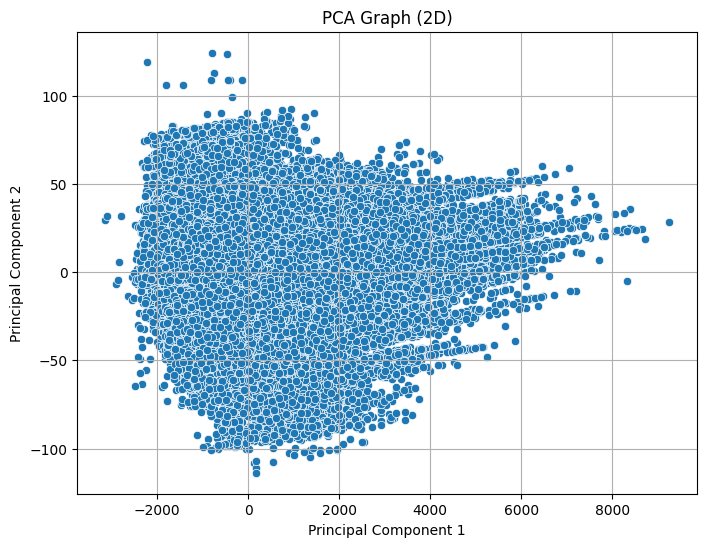

In [37]:
# Principal Component Analysis

# Exclude datetime as PCA only accepts numeric
X_train_numeric = X_train_encoded.drop(columns=['date_sold'])
X_test_numeric = X_test_encoded.drop(columns=['date_sold'])

# Initialise PCA with 10 components
pca = PCA(n_components=10)
pca.fit(X_train_numeric)

X_train_pca = pca.transform(X_train_numeric)

print("Shape of Transformed Data", X_train_pca.shape)

# Plot PCA graph (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])
plt.title('PCA Graph (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Feature Selection

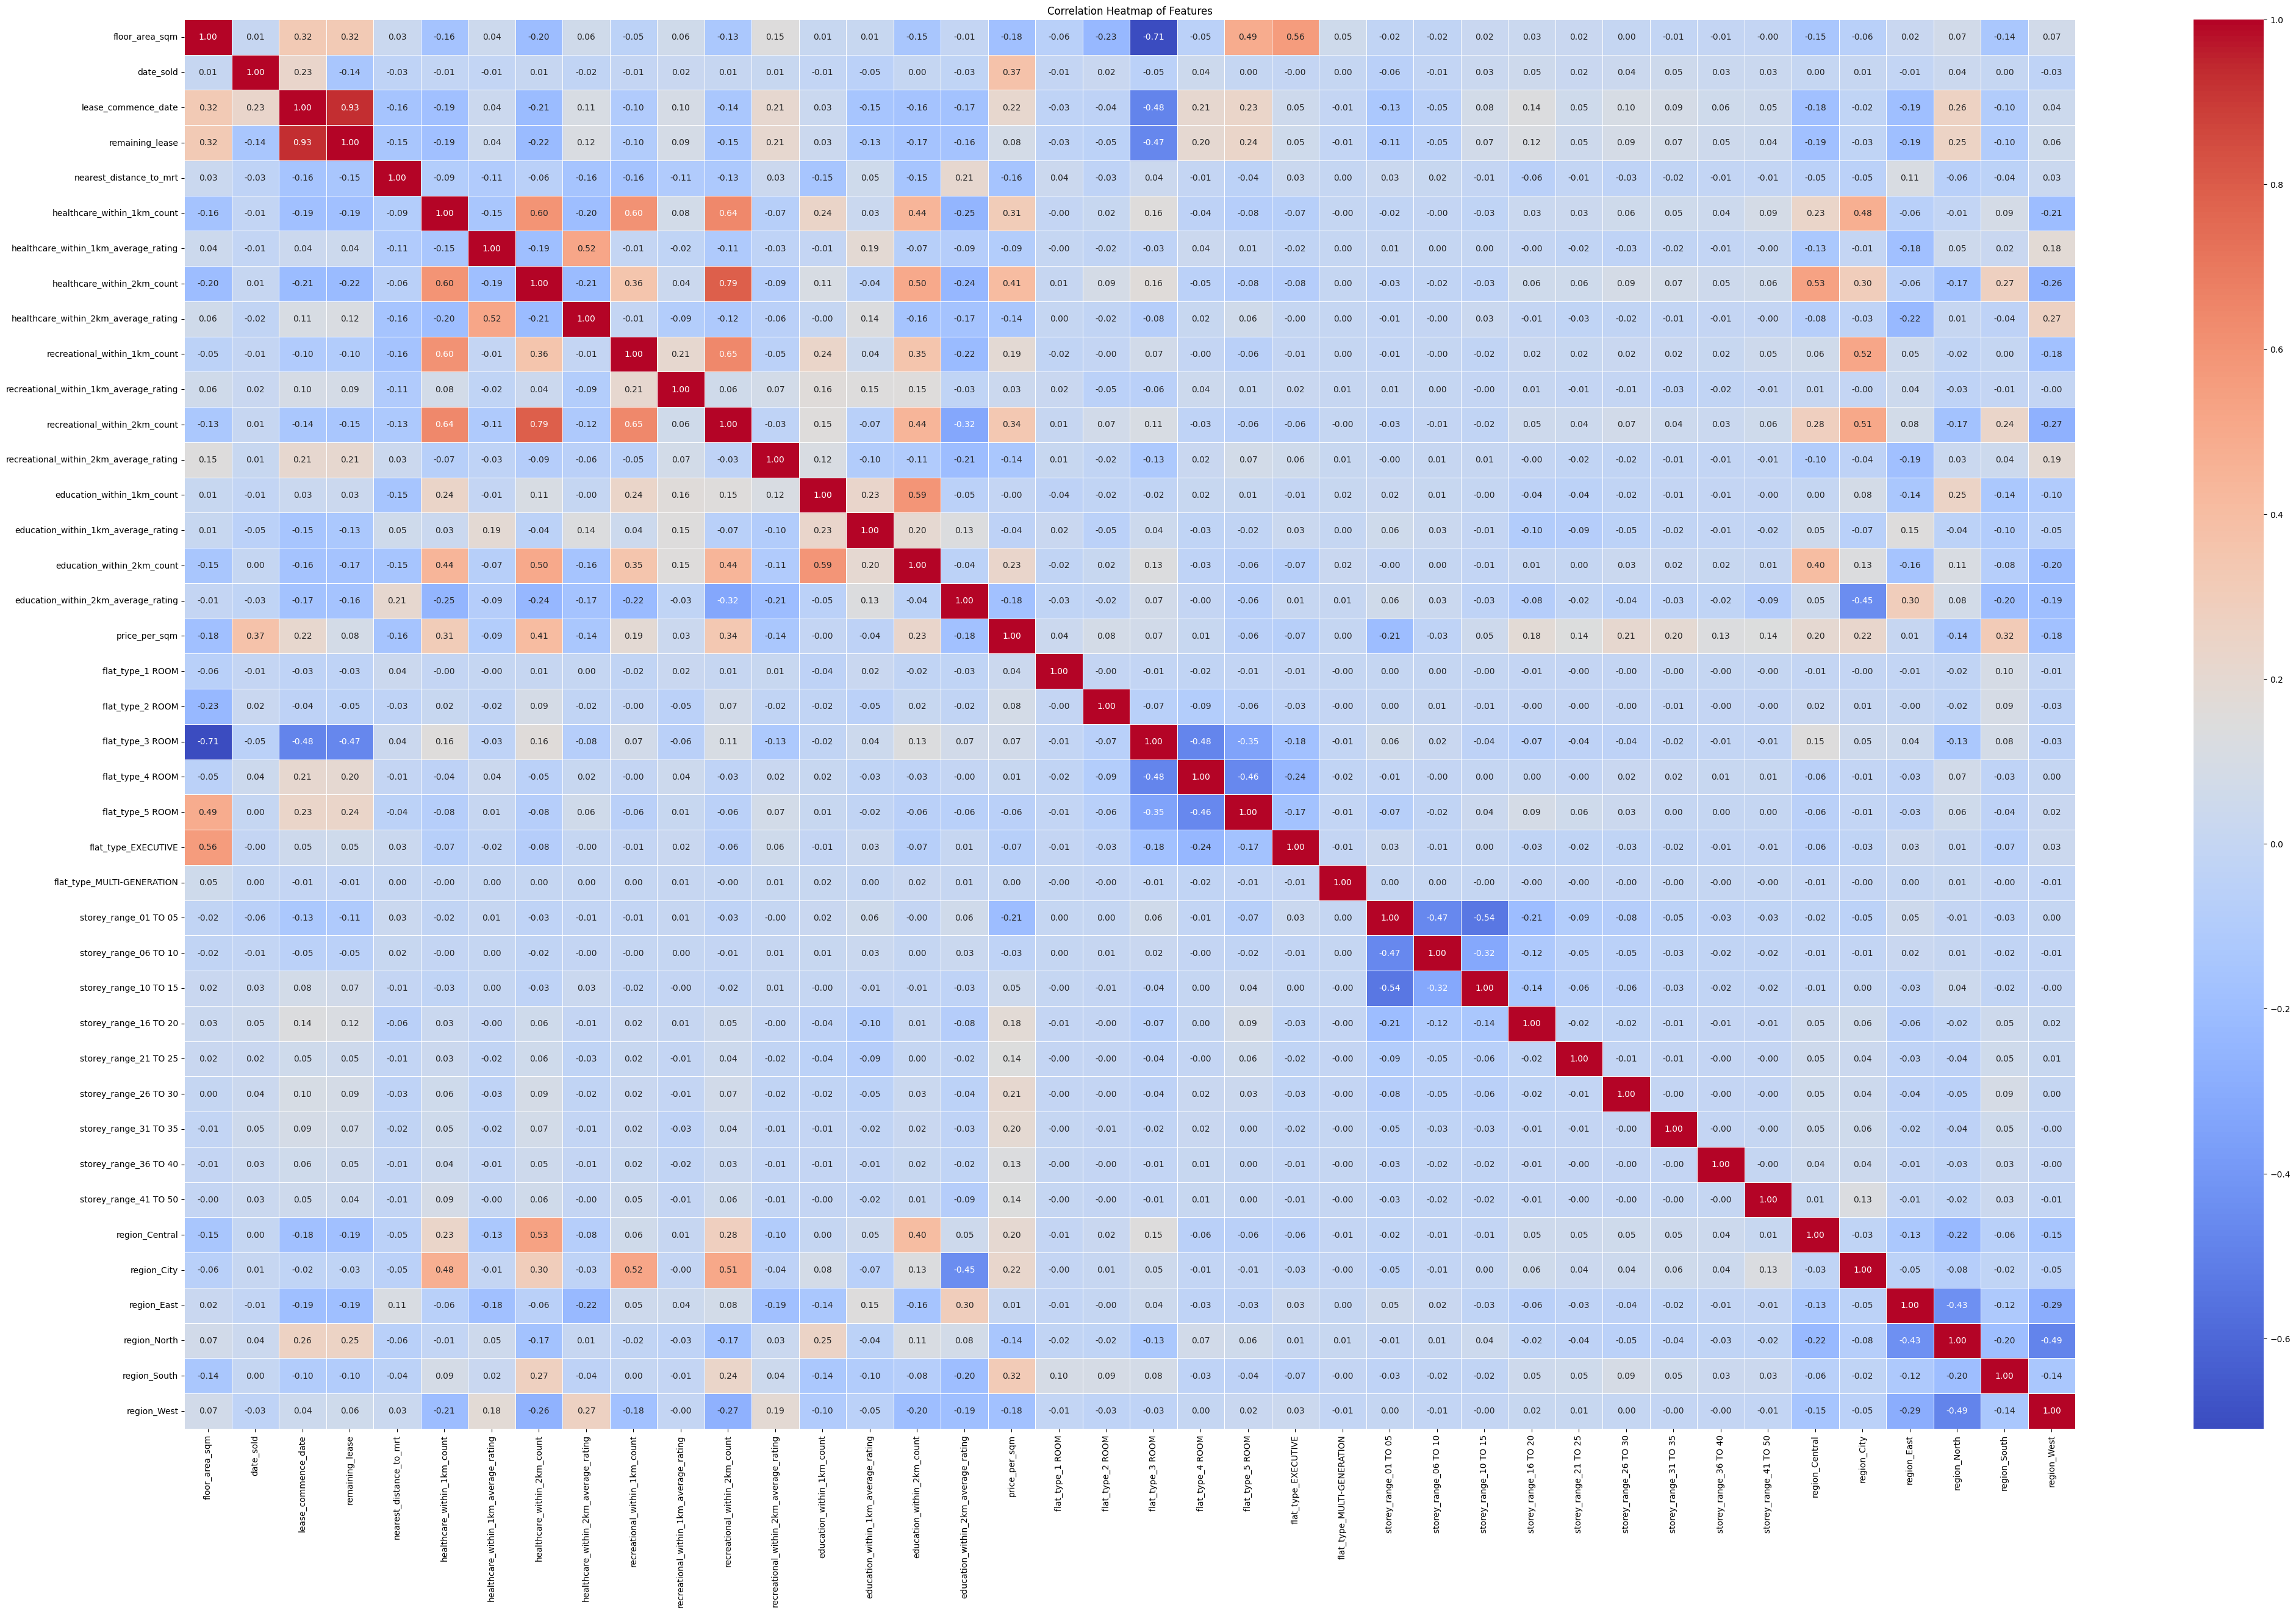

In [39]:
# Compute the correlation matrix
corr_matrix = X_train_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(50, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()

We will drop `lease_commence_date` for the following reasons:
1. `lease_commence_date` is similar to `remaining_lease` high correlation of 0.93 is observed
2. `remaining_lease` provides more useful comparisons compared to `lease_commence_date`

In [41]:
# Initialize VarianceThreshold with the desired threshold
threshold = 0.05
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(X_train_numeric)

# Get the indices of all features
all_indices = range(len(X_train_numeric.columns))

# Get the indices of the features that are retained
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train_numeric.columns[selected_indices]

# Display the selected features
print("Selected features:", selected_features)

# Get the indices of the features that are not selected
not_selected_indices = list(set(all_indices) - set(selected_indices))

# Get the names of the features that are not selected
not_selected_features = X_train_numeric.columns[not_selected_indices]

# Display the features that are not selected
print("Not selected features:", not_selected_features)

Selected features: Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease',
       'nearest_distance_to_mrt', 'healthcare_within_1km_count',
       'healthcare_within_1km_average_rating', 'healthcare_within_2km_count',
       'healthcare_within_2km_average_rating', 'recreational_within_1km_count',
       'recreational_within_1km_average_rating',
       'recreational_within_2km_count', 'education_within_1km_count',
       'education_within_1km_average_rating', 'education_within_2km_count',
       'price_per_sqm', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'storey_range_01 TO 05',
       'storey_range_06 TO 10', 'storey_range_10 TO 15', 'region_Central',
       'region_East', 'region_North', 'region_South', 'region_West'],
      dtype='object')
Not selected features: Index(['storey_range_41 TO 50', 'region_City',
       'recreational_within_2km_average_rating',
       'education_within_2km_average_rating', 'flat_type_1 ROOM',
     

In [42]:
# Keep selected features

# Transform your data to keep only the selected features
X_train_selected_array = selector.fit_transform(X_train_numeric)
X_test_selected_array = selector.transform(X_test_numeric)

# Convert the transformed data back to a DataFrame
X_train_selected = pd.DataFrame(X_train_selected_array, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected_array, columns=selected_features)

print(X_train_selected.info())
print(X_test_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253486 entries, 0 to 253485
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   floor_area_sqm                          253486 non-null  float64
 1   lease_commence_date                     253486 non-null  float64
 2   remaining_lease                         253486 non-null  float64
 3   nearest_distance_to_mrt                 253486 non-null  float64
 4   healthcare_within_1km_count             253486 non-null  float64
 5   healthcare_within_1km_average_rating    253486 non-null  float64
 6   healthcare_within_2km_count             253486 non-null  float64
 7   healthcare_within_2km_average_rating    253486 non-null  float64
 8   recreational_within_1km_count           253486 non-null  float64
 9   recreational_within_1km_average_rating  253486 non-null  float64
 10  recreational_within_2km_count           2534

## Machine Learning Modelling

### Regression Metrics

1. **Mean Absolute Error (MAE)**
   - Formula: $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $
   - Description: The average of the absolute differences between the predicted values and actual values. It gives an idea of how wrong the predictions were.
   

2. **Mean Absolute Percentage Error (MAPE)**
   - Formula: $ \text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} |\frac{y_i - \hat{y}_i}{y_i}| $
   - Description: Provides an intuitive understanding of model's predictive accuracy relative to actual values. It measures the absolute percentage difference between the predicted values and the actual values.


3. **Mean Squared Error (MSE)**
   - Formula: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
   - Description: The average of the squared differences between the predicted values and actual values. It penalizes larger errors more than MAE.


4. **Root Mean Squared Error (RMSE)**
   - Formula: $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
   - Description: The square root of the average of the squared differences between the predicted values and actual values. It is in the same units as the response variable and is sensitive to outliers.


5. **R-squared (Coefficient of Determination)**
   - Formula: $ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $
   - Description: The proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a measure of how well observed outcomes are replicated by the model.



In [23]:
# Evaluation 
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    # mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    
    print("Mean Absolute Error (MAE):", mae)
    # print("Mean Absolute Percentage Error (MAPE):", mape)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared Coefficient (R^2):", r_squared)

In [24]:
# Features Used
feature_names = X_train_selected.columns

### Baseline Modelling 

We will trial a selected few baseline models to evaluate their performance before selecting the best baseline model to proceed with Hyperparameter Tuning and the subsequent Advanced Modelling which builds on top of Baseline Modelling.

##### Model Training

In [24]:
# Linear Regression
reg_lr = LinearRegression().fit(X_train_selected, y_train)
y_pred_lr = reg_lr.predict(X_test_selected)

evaluate(y_test, y_pred_lr)

Mean Absolute Error (MAE): 15997.76545680088
Mean Squared Error (MSE): 616453880.6893471
Root Mean Squared Error (RMSE): 24828.48929535076
R-squared Coefficient (R^2): 0.9715517505395238


In [25]:
# Decision Tree Regressor
reg_dtr = DecisionTreeRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_dtr = reg_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_dtr)

Mean Absolute Error (MAE): 360.71496613251907
Mean Squared Error (MSE): 5185215.998973024
Root Mean Squared Error (RMSE): 2277.106936218197
R-squared Coefficient (R^2): 0.9997607115100318


Given Decision Tree Regressor outperforms Linear Regression as it has a greater R-Squared Coefficient of 0.99971 > 0.97155, we will be proceeding with Decision Tree Regressor as our baseline model.

##### Cross Validation

<Axes: title={'center': 'Decision Tree Learning Curve (MAPE)'}, xlabel='Training examples', ylabel='Score'>

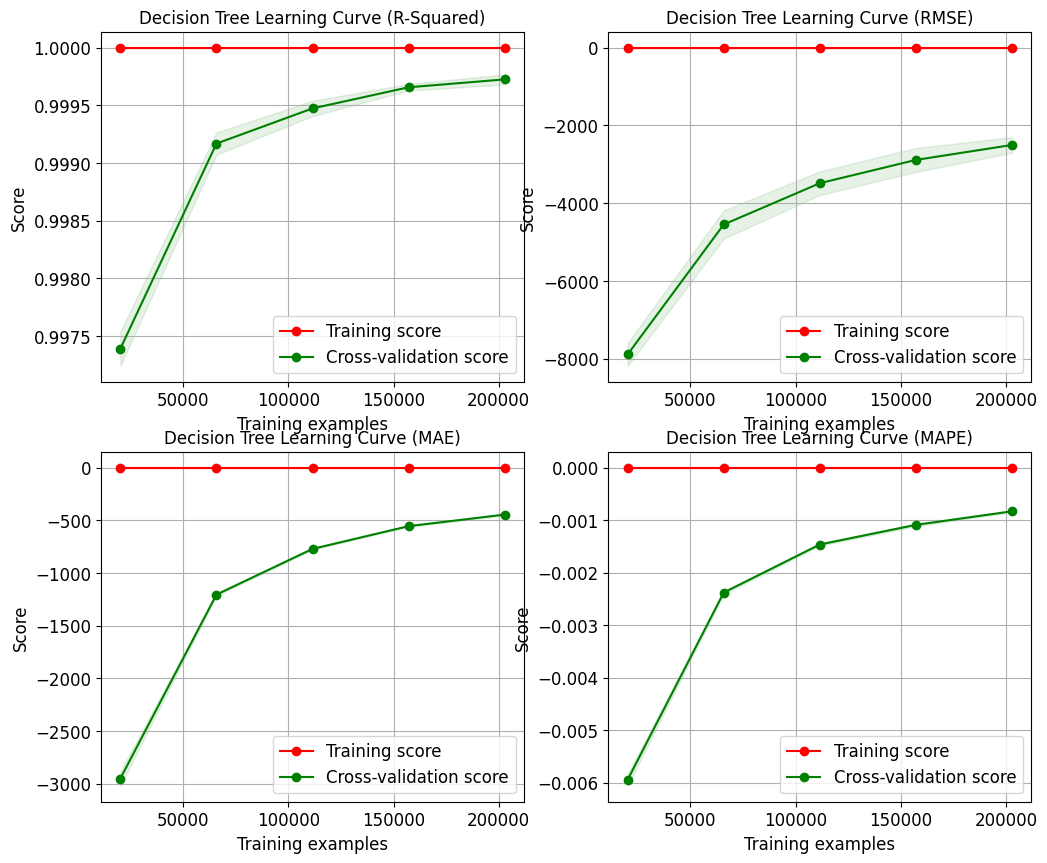

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
ax1, ax2, ax3, ax4 = axes.flatten() 

# Learning curves
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Learning Curve (R-Squared)", ax=ax1)
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_root_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Learning Curve (RMSE)", ax=ax2)
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Learning Curve (MAE)", ax=ax3)
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_percentage_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Learning Curve (MAPE)", ax=ax4)

Training Score Curve shows the model's performance based on the training dataset as a function of the number of training examples used. Validation Score Curve shows the model's performance on a separate validation dataset as a function of the number of training examples used. 

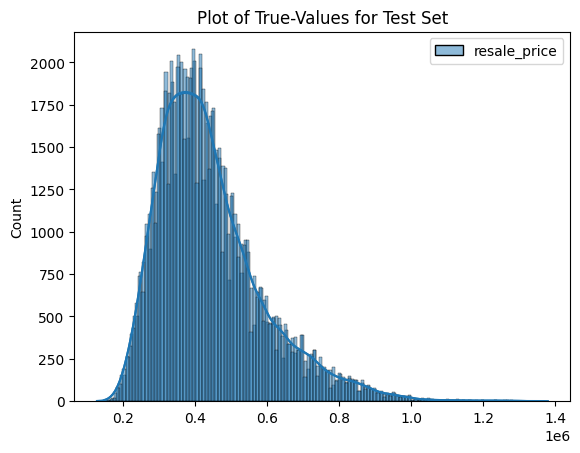

In [27]:
# Plot graph to visualise how far predictions are from true-values for test set
sns.histplot(y_test, label='true', color='red', kde=True)
sns.histplot(y_pred_dtr, label='predicted', kde=True)
plt.title("Plot of True-Values for Test Set")
plt.show()

In [28]:
# Print Text Representation of Decision Tree Regressor rules
text_representation_dtr = tree.export_text(reg_dtr)
print(text_representation_dtr)

|--- feature_0 <= 84.50
|   |--- feature_13 <= 5889.65
|   |   |--- feature_13 <= 4340.92
|   |   |   |--- feature_0 <= 74.50
|   |   |   |   |--- feature_13 <= 3752.77
|   |   |   |   |   |--- feature_13 <= 3418.55
|   |   |   |   |   |   |--- feature_0 <= 65.50
|   |   |   |   |   |   |   |--- feature_13 <= 3137.03
|   |   |   |   |   |   |   |   |--- feature_0 <= 62.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  10.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [140000.00]
|   |   |   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 2525.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  2525.00
|   |   |   |   |   |

##### Hyperparameter Tuning

In [30]:
# Decision Tree Model Parameters
reg_dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [31]:
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
    
# Use RandomSearch 
param_dist = {
    "max_depth": randint(1, 20),  
    "min_samples_split": randint(2, 40),  
    "min_samples_leaf": randint(1, 20), 
    "max_features": ["auto", "sqrt", "log2", None],
}

rscv_dtr = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state=42), param_distributions = param_dist, n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = -1).fit(X_train_selected, y_train)

best_params_dtr = rscv_dtr.best_params_
print("Best Parameters For Decision Tree:", best_params_dtr)

y_pred_rscv_dtr = rscv_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_rscv_dtr)

Best Parameters For Decision Tree: {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 16}
Mean Absolute Error (MAE): 612.9295348073794
Mean Squared Error (MSE): 9871602.791784018
Root Mean Squared Error (RMSE): 3141.9106912488805
R-squared Coefficient (R^2): 0.9995444431001369


In [23]:
# Use Grid Search
params = { 
    'max_depth': [5, 10, 12, 15, 17, 20],     
    'min_samples_split': [2, 5, 10, 15, 20, 40], 
    'min_samples_leaf': [1, 3, 5, 7, 10, 20],
    "max_features": ['auto', None],
}

gscv_dtr = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42), param_grid = params, scoring = 'neg_root_mean_squared_error', n_jobs = -1).fit(X_train_selected, y_train)

best_params_dtr = gscv_dtr.best_params_
print("Best Parameters For Decision Tree:", best_params_dtr)

y_pred_gscv_dtr = gscv_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_gscv_dtr)

Best Parameters For Decision Tree: {'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Absolute Error (MAE): 402.732339277825
Mean Squared Error (MSE): 5152119.221235374
Root Mean Squared Error (RMSE): 2269.828015783437
R-squared Coefficient (R^2): 0.9997622388674203


After Hyperparameter Tuning, the RMSE of the tuned model has decreased from 2504 to 2270 when compared to the model before Hyperparameter Tuning. The best hyperparameters are 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 1 and 'min_samples_split': 5.

##### Feature Evaluation

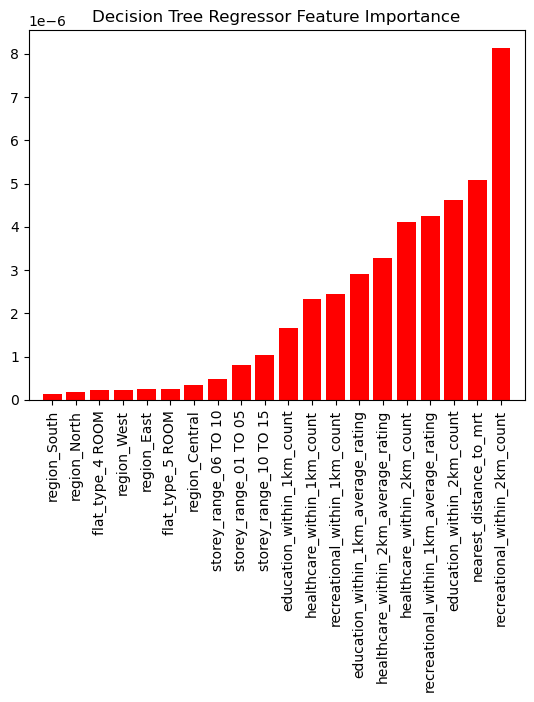

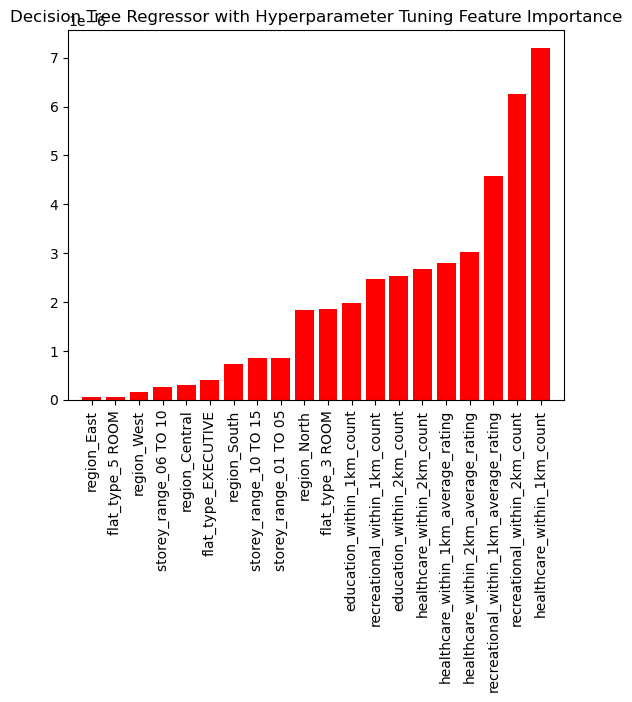

In [ ]:
# Feature Importance Visualisation
skplt.estimators.plot_feature_importances(reg_dtr, feature_names = feature_names,
                                         title="Decision Tree Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending");
skplt.estimators.plot_feature_importances(gscv_dtr.best_estimator_, feature_names = feature_names,
                                         title="Decision Tree Regressor with Hyperparameter Tuning Feature Importance",
                                         x_tick_rotation=90, order="ascending");

The Decision Tree Regressor Feature Importance plot displays the significance of each attribute in the regression model. The features, labeled on the x-axis, are ranked according to their importance scores on the y-axis. A higher bar denotes a greater influence on the model's predictions, with "recreational_within_2km_count" standing out as the most impactful feature in this particular model. However, after hyperparameter tuning, "healthcare_within_1km_count" stood out as the most impactful feature in this particular model.

### Advanced Modelling 

From the Baseline Decision Tree Model, we will look into more complex Ensemble models for better performance.

#### Random Forest Regressor

In [ ]:
# Random Forest Regressor
reg_rfr = RandomForestRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_rfr = reg_rfr.predict(X_test_selected)

evaluate(y_test, y_pred_rfr)

Mean Absolute Error (MAE): 251.47289441513638
Mean Squared Error (MSE): 4011083.9197759186
Root Mean Squared Error (RMSE): 2002.7690630164823
R-squared Coefficient (R^2): 0.9998148956158259


##### Cross Validation

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
ax1, ax2, ax3, ax4 = axes.flatten() 

# Learning curves
skplt.estimators.plot_learning_curve(RandomForestRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random Forest Learning Curve (R-Squared)", ax=ax1)
skplt.estimators.plot_learning_curve(RandomForestRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_root_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random Forest Learning Curve (RMSE)", ax=ax2)
skplt.estimators.plot_learning_curve(RandomForestRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random Forest Learning Curve (MAE)", ax=ax3)
skplt.estimators.plot_learning_curve(RandomForestRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_percentage_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random Forest Learning Curve (MAPE)", ax=ax4)

In [ ]:
# Plot graph to visualise how far predictions are from true-values for test set
sns.histplot(y_test, label='true', color='red', kde=True)
sns.histplot(y_pred_rfr, label='predicted', kde=True)
plt.title("Plot of True-Values for Test Set")
plt.show()

##### Hyperparameter Tuning

In [ ]:
# Random Forest Model Parameters
reg_rfr.get_params()

In [ ]:
# Use Grid Search
params = { 
    # Params
}

gscv_rfr = GridSearchCV(estimator = RandomForestRegressor(random_state=42), param_grid = params, scoring = 'neg_root_mean_squared_error', n_jobs = -1).fit(X_train_selected, y_train)

best_params_rfr = gscv_rfr.best_params_
print("Best Parameters For Random Forest:", best_params_rfr)

y_pred_gscv_rfr = gscv_rfr.predict(X_test_selected)

evaluate(y_test, y_pred_gscv_rfr)

After Hyperparameter Tuning, the RMSE of the tuned model has [increased/decreased] from [value] to [value] when compared to the model before Hyperparameter Tuning. The best hyperparameters are [params].

##### Feature Evaluation

In [ ]:
# Feature Importance Visualisation
skplt.estimators.plot_feature_importances(reg_rfr, feature_names = feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending");
skplt.estimators.plot_feature_importances(gscv_rfr.best_estimator_, feature_names = feature_names,
                                         title="Random Forest Regressor with Hyperparameter Tuning Feature Importance",
                                         x_tick_rotation=90, order="ascending");

The Random Forest Regressor Feature Importance plot displays the significance of each attribute in the regression model. A higher bar denotes a greater influence on the model's predictions, with "feature_name" standing out as the most impactful feature in this particular model. However, after hyperparameter tuning, "feature_name" stood out as the most impactful feature in this particular model.

#### XGBoost Regressor

In [ ]:
reg_xgbr = XGBRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_xgbr = reg_xgbr.predict(X_test_selected)

evaluate(y_test, y_pred_xgbr)

In [ ]:
## USE CELLS HERE

#### LightGBM Regressor

In [ ]:
reg_lgbmr = LGBMRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_lgmbr = reg_lgbmr.predict(X_test_selected)

evaluate(y_test, y_pred_lgbmr)

In [ ]:
## USE CELLS HERE

#### CatBoost Regressor

In [ ]:
reg_cbr = cb.CatBoostRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_cbr = reg_cbr.predict(X_test_selected)

evaluate(y_test, y_pred_cbr)

Learning rate set to 0.098176
0:	learn: 133983.2227914	total: 192ms	remaining: 3m 11s
1:	learn: 122654.4395760	total: 235ms	remaining: 1m 57s
2:	learn: 112508.1002723	total: 280ms	remaining: 1m 33s
3:	learn: 103346.2128993	total: 323ms	remaining: 1m 20s
4:	learn: 95017.0975006	total: 368ms	remaining: 1m 13s
5:	learn: 87522.9638465	total: 421ms	remaining: 1m 9s
6:	learn: 80797.4608775	total: 464ms	remaining: 1m 5s
7:	learn: 74685.5959329	total: 510ms	remaining: 1m 3s
8:	learn: 68932.5361395	total: 553ms	remaining: 1m
9:	learn: 63921.7280263	total: 602ms	remaining: 59.6s
10:	learn: 59182.0566974	total: 650ms	remaining: 58.4s
11:	learn: 54852.7804771	total: 694ms	remaining: 57.2s
12:	learn: 51014.8502410	total: 740ms	remaining: 56.2s
13:	learn: 47415.3719573	total: 783ms	remaining: 55.1s
14:	learn: 44158.1201672	total: 827ms	remaining: 54.3s
15:	learn: 41170.5849796	total: 871ms	remaining: 53.6s
16:	learn: 38471.5843847	total: 922ms	remaining: 53.3s
17:	learn: 36070.4875304	total: 977ms	r

151:	learn: 5238.7157311	total: 7.44s	remaining: 41.5s
152:	learn: 5221.8183976	total: 7.49s	remaining: 41.5s
153:	learn: 5206.5044681	total: 7.54s	remaining: 41.4s
154:	learn: 5195.7319788	total: 7.59s	remaining: 41.4s
155:	learn: 5179.8653314	total: 7.63s	remaining: 41.3s
156:	learn: 5170.4238817	total: 7.69s	remaining: 41.3s
157:	learn: 5157.4536138	total: 7.75s	remaining: 41.3s
158:	learn: 5149.9309871	total: 7.79s	remaining: 41.2s
159:	learn: 5136.7454140	total: 7.84s	remaining: 41.2s
160:	learn: 5128.0464822	total: 7.89s	remaining: 41.1s
161:	learn: 5118.6866603	total: 7.94s	remaining: 41.1s
162:	learn: 5112.9978822	total: 7.98s	remaining: 41s
163:	learn: 5108.0351889	total: 8.03s	remaining: 40.9s
164:	learn: 5094.4830030	total: 8.07s	remaining: 40.9s
165:	learn: 5088.3970240	total: 8.13s	remaining: 40.8s
166:	learn: 5078.7864230	total: 8.18s	remaining: 40.8s
167:	learn: 5068.9470920	total: 8.23s	remaining: 40.8s
168:	learn: 5059.8939049	total: 8.27s	remaining: 40.7s
169:	learn: 

304:	learn: 4091.0589660	total: 15.5s	remaining: 35.3s
305:	learn: 4088.7686795	total: 15.6s	remaining: 35.3s
306:	learn: 4080.8610424	total: 15.6s	remaining: 35.2s
307:	learn: 4079.7538374	total: 15.6s	remaining: 35.2s
308:	learn: 4071.5486513	total: 15.7s	remaining: 35.1s
309:	learn: 4067.3576612	total: 15.8s	remaining: 35.1s
310:	learn: 4061.6720831	total: 15.8s	remaining: 35s
311:	learn: 4059.4346717	total: 15.8s	remaining: 34.9s
312:	learn: 4055.1278805	total: 15.9s	remaining: 34.9s
313:	learn: 4050.3867566	total: 15.9s	remaining: 34.8s
314:	learn: 4042.9356478	total: 16s	remaining: 34.7s
315:	learn: 4040.8265776	total: 16s	remaining: 34.7s
316:	learn: 4036.5216491	total: 16.1s	remaining: 34.6s
317:	learn: 4033.6717061	total: 16.1s	remaining: 34.5s
318:	learn: 4031.2339484	total: 16.1s	remaining: 34.5s
319:	learn: 4029.7272353	total: 16.2s	remaining: 34.4s
320:	learn: 4024.7178089	total: 16.2s	remaining: 34.3s
321:	learn: 4020.9375065	total: 16.3s	remaining: 34.3s
322:	learn: 4016

458:	learn: 3643.0487089	total: 22.4s	remaining: 26.4s
459:	learn: 3638.2967873	total: 22.4s	remaining: 26.3s
460:	learn: 3635.0461439	total: 22.5s	remaining: 26.3s
461:	learn: 3632.3233556	total: 22.5s	remaining: 26.2s
462:	learn: 3630.2177140	total: 22.6s	remaining: 26.2s
463:	learn: 3628.0458283	total: 22.6s	remaining: 26.1s
464:	learn: 3625.9834813	total: 22.7s	remaining: 26.1s
465:	learn: 3624.9495212	total: 22.7s	remaining: 26s
466:	learn: 3623.1449095	total: 22.8s	remaining: 26s
467:	learn: 3621.9903166	total: 22.8s	remaining: 25.9s
468:	learn: 3620.0451181	total: 22.8s	remaining: 25.8s
469:	learn: 3617.0727095	total: 22.9s	remaining: 25.8s
470:	learn: 3616.5074745	total: 22.9s	remaining: 25.7s
471:	learn: 3615.1343303	total: 23s	remaining: 25.7s
472:	learn: 3612.6255408	total: 23s	remaining: 25.6s
473:	learn: 3610.7475338	total: 23s	remaining: 25.6s
474:	learn: 3608.9541581	total: 23.1s	remaining: 25.5s
475:	learn: 3607.8537392	total: 23.1s	remaining: 25.5s
476:	learn: 3605.833

611:	learn: 3377.8067643	total: 29.9s	remaining: 19s
612:	learn: 3377.1695876	total: 30s	remaining: 18.9s
613:	learn: 3375.8494832	total: 30s	remaining: 18.9s
614:	learn: 3375.1169031	total: 30.1s	remaining: 18.8s
615:	learn: 3374.4334257	total: 30.1s	remaining: 18.8s
616:	learn: 3373.7397186	total: 30.2s	remaining: 18.7s
617:	learn: 3371.0920831	total: 30.2s	remaining: 18.7s
618:	learn: 3369.0780560	total: 30.3s	remaining: 18.6s
619:	learn: 3367.2533009	total: 30.3s	remaining: 18.6s
620:	learn: 3366.4336143	total: 30.4s	remaining: 18.6s
621:	learn: 3364.4838376	total: 30.5s	remaining: 18.5s
622:	learn: 3362.7408742	total: 30.5s	remaining: 18.5s
623:	learn: 3359.6194146	total: 30.6s	remaining: 18.4s
624:	learn: 3357.2013965	total: 30.7s	remaining: 18.4s
625:	learn: 3355.5828303	total: 30.7s	remaining: 18.4s
626:	learn: 3354.4683011	total: 30.8s	remaining: 18.3s
627:	learn: 3353.0320675	total: 30.8s	remaining: 18.3s
628:	learn: 3351.7444108	total: 30.9s	remaining: 18.2s
629:	learn: 3349

762:	learn: 3194.3322372	total: 36.9s	remaining: 11.5s
763:	learn: 3192.7537887	total: 36.9s	remaining: 11.4s
764:	learn: 3191.4902264	total: 37s	remaining: 11.4s
765:	learn: 3190.8359780	total: 37s	remaining: 11.3s
766:	learn: 3190.4002250	total: 37.1s	remaining: 11.3s
767:	learn: 3189.0579660	total: 37.1s	remaining: 11.2s
768:	learn: 3188.4957334	total: 37.2s	remaining: 11.2s
769:	learn: 3187.9198229	total: 37.2s	remaining: 11.1s
770:	learn: 3187.1823369	total: 37.2s	remaining: 11.1s
771:	learn: 3186.7333247	total: 37.3s	remaining: 11s
772:	learn: 3185.7909432	total: 37.3s	remaining: 11s
773:	learn: 3185.0699387	total: 37.4s	remaining: 10.9s
774:	learn: 3183.8425587	total: 37.4s	remaining: 10.9s
775:	learn: 3182.4661809	total: 37.5s	remaining: 10.8s
776:	learn: 3181.9178993	total: 37.5s	remaining: 10.8s
777:	learn: 3181.3481963	total: 37.5s	remaining: 10.7s
778:	learn: 3180.3923182	total: 37.6s	remaining: 10.7s
779:	learn: 3179.8447686	total: 37.6s	remaining: 10.6s
780:	learn: 3178.5

916:	learn: 3069.1678892	total: 45s	remaining: 4.07s
917:	learn: 3067.3615032	total: 45s	remaining: 4.02s
918:	learn: 3067.0679796	total: 45s	remaining: 3.97s
919:	learn: 3066.2919323	total: 45.1s	remaining: 3.92s
920:	learn: 3065.8398975	total: 45.1s	remaining: 3.87s
921:	learn: 3065.2297054	total: 45.2s	remaining: 3.82s
922:	learn: 3064.3102049	total: 45.2s	remaining: 3.77s
923:	learn: 3063.2907525	total: 45.3s	remaining: 3.73s
924:	learn: 3062.8201339	total: 45.3s	remaining: 3.68s
925:	learn: 3062.2404981	total: 45.4s	remaining: 3.63s
926:	learn: 3061.7890240	total: 45.5s	remaining: 3.58s
927:	learn: 3060.7464566	total: 45.5s	remaining: 3.53s
928:	learn: 3059.7625833	total: 45.5s	remaining: 3.48s
929:	learn: 3059.2399526	total: 45.6s	remaining: 3.43s
930:	learn: 3058.7041830	total: 45.7s	remaining: 3.38s
931:	learn: 3058.1637819	total: 45.7s	remaining: 3.34s
932:	learn: 3057.5392955	total: 45.8s	remaining: 3.29s
933:	learn: 3056.9334338	total: 45.8s	remaining: 3.24s
934:	learn: 3056

##### Cross Validation

<AxesSubplot:title={'center':'Cat Boost Learning Curve (MAPE)'}, xlabel='Training examples', ylabel='Score'>

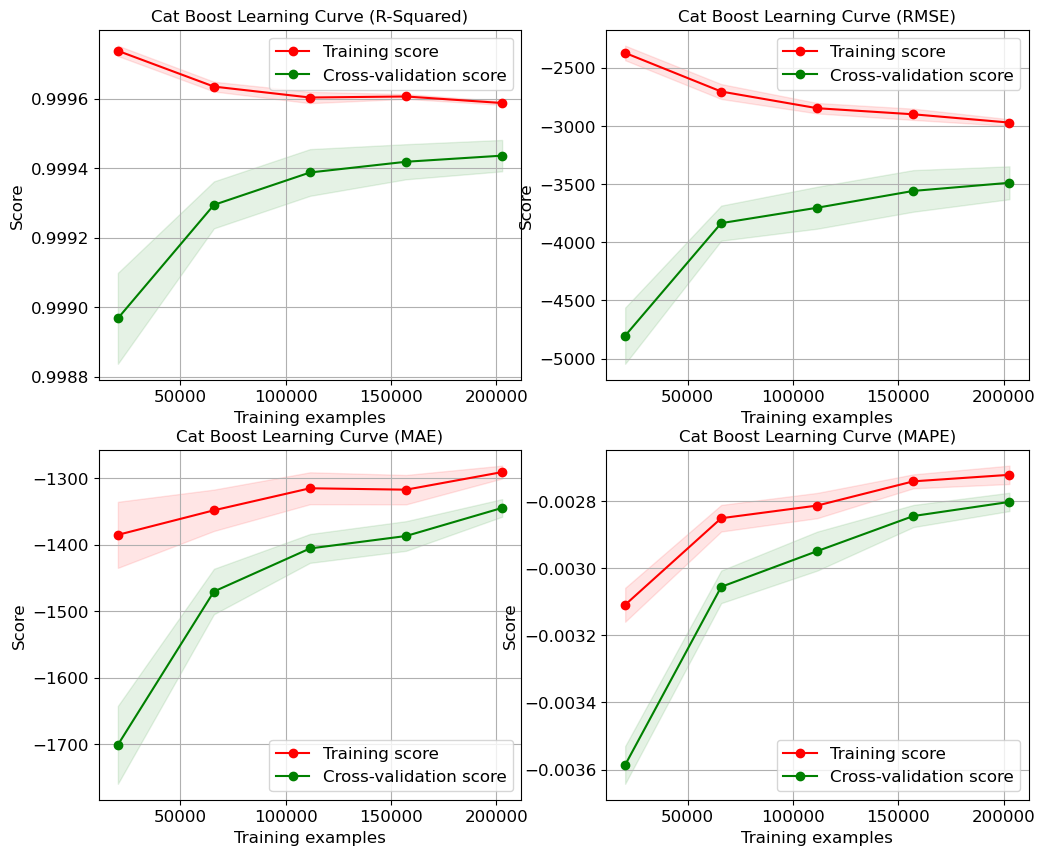

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
ax1, ax2, ax3, ax4 = axes.flatten() 

# Learning curves
skplt.estimators.plot_learning_curve(cb.CatBoostRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Cat Boost Learning Curve (R-Squared)", ax=ax1)
skplt.estimators.plot_learning_curve(cb.CatBoostRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_root_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Cat Boost Learning Curve (RMSE)", ax=ax2)
skplt.estimators.plot_learning_curve(cb.CatBoostRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Cat Boost Learning Curve (MAE)", ax=ax3)
skplt.estimators.plot_learning_curve(cb.CatBoostRegressor(random_state=42), X_train_selected, y_train,
                                     cv = 5, shuffle=True, scoring="neg_mean_absolute_percentage_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Cat Boost Learning Curve (MAPE)", ax=ax4)

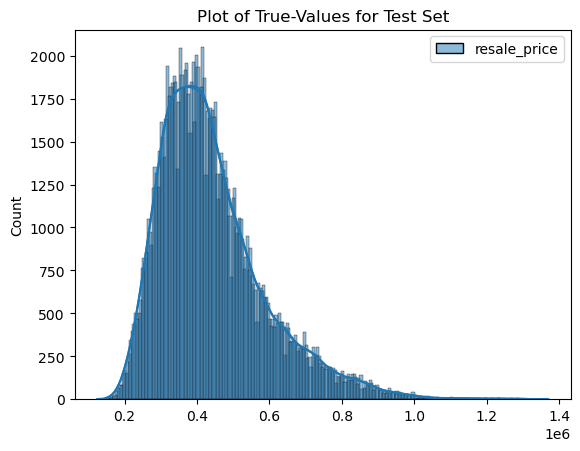

In [22]:
# Plot graph to visualise how far predictions are from true-values for test set
sns.histplot(y_test, label='true', color='red', kde=True)
sns.histplot(y_pred_cbr, label='predicted', kde=True)
plt.title("Plot of True-Values for Test Set")
plt.show()

##### Hyperparameter Tuning

In [21]:
# https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

# Cat Boost Model Parameters
reg_cbr.get_params()

{'loss_function': 'RMSE', 'random_state': 42}

In [23]:
# https://catboost.ai/en/docs/concepts/parameter-tuning

# Use GridSearch 
params = { 
    'iterations': [100], 
    'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.10], 
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.66, 0.8],
}

gscv_cbr = GridSearchCV(estimator = cb.CatBoostRegressor(random_state=42), param_grid = params, scoring = 'neg_root_mean_squared_error', n_jobs = -1).fit(X_train_selected, y_train)

best_params_cbr = gscv_cbr.best_params_
print("Best Parameters For Cat Boost:", best_params_cbr)

y_pred_gscv_cbr = gscv_cbr.predict(X_test_selected)

evaluate(y_test, y_pred_gscv_cbr)

0:	learn: 133267.4926627	total: 167ms	remaining: 16.5s
1:	learn: 121113.8255956	total: 341ms	remaining: 16.7s
2:	learn: 110169.2444131	total: 553ms	remaining: 17.9s
3:	learn: 100255.0221129	total: 747ms	remaining: 17.9s
4:	learn: 91333.3755261	total: 939ms	remaining: 17.8s
5:	learn: 83316.3899579	total: 1.09s	remaining: 17.1s
6:	learn: 75978.8019704	total: 1.26s	remaining: 16.8s
7:	learn: 69406.2440322	total: 1.45s	remaining: 16.7s
8:	learn: 63406.2012725	total: 1.65s	remaining: 16.6s
9:	learn: 58047.9619347	total: 1.85s	remaining: 16.7s
10:	learn: 53111.5351574	total: 2.09s	remaining: 16.9s
11:	learn: 48671.8762084	total: 2.36s	remaining: 17.3s
12:	learn: 44589.8958487	total: 2.58s	remaining: 17.3s
13:	learn: 40802.1970852	total: 2.75s	remaining: 16.9s
14:	learn: 37472.6710391	total: 2.93s	remaining: 16.6s
15:	learn: 34405.5804270	total: 3.1s	remaining: 16.3s
16:	learn: 31694.2444308	total: 3.28s	remaining: 16s
17:	learn: 29205.8990774	total: 3.46s	remaining: 15.8s
18:	learn: 26971.72

After Hyperparameter Tuning, the RMSE of the tuned model has increased from 3540 to 4961 when compared to the model before Hyperparameter Tuning. The best hyperparameters are 'depth': 10, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 0.66.

##### Feature Evaluation

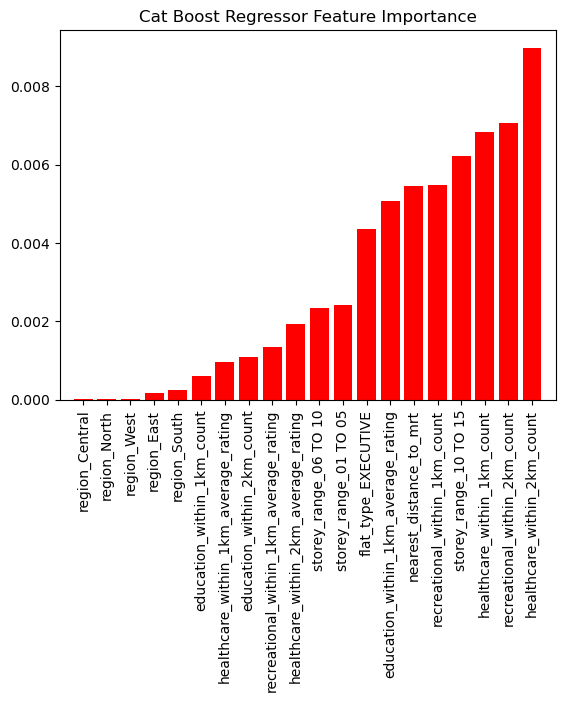

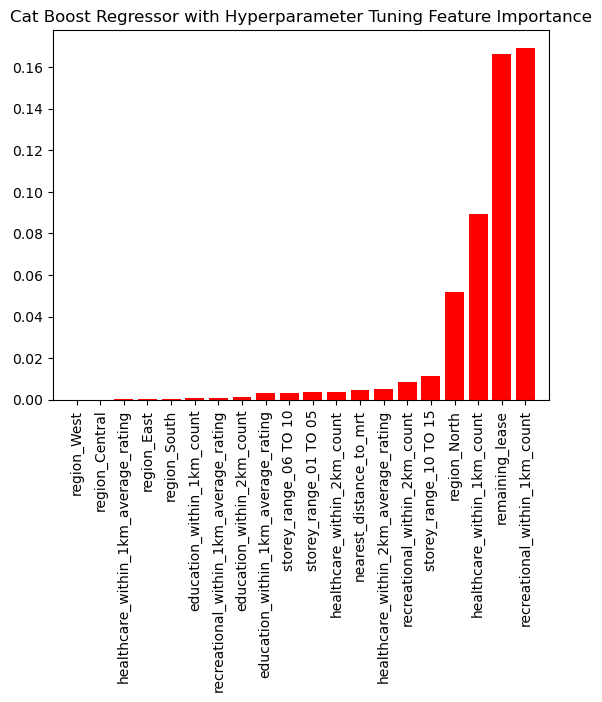

In [25]:
# Feature Importance Visualisation
skplt.estimators.plot_feature_importances(reg_cbr, feature_names = feature_names,
                                         title="Cat Boost Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending");
skplt.estimators.plot_feature_importances(gscv_cbr.best_estimator_, feature_names = feature_names,
                                         title="Cat Boost Regressor with Hyperparameter Tuning Feature Importance",
                                         x_tick_rotation=90, order="ascending");

The Cat Boost Regressor Feature Importance plot displays the significance of each attribute in the regression model. A higher bar denotes a greater influence on the model's predictions, with "healthcare_within_2km_count" standing out as the most impactful feature in this particular model. However, after hyperparameter tuning, "recreational_within_1km_count" stood out as the most impactful feature in this particular model.

### Conclusion

Based on the model trainings of the 4 advanced models, [Model Name] is the best performing model with the highest coefficient of determination of [value] and the lowest RMSE of [value]. The rankings for the performance of the advanced models are as follows [Model A] > [Model B] > [Model C] > [Model D]. Given [Model Name] is the best performing model, we will be using [Model Name] for the future predictions of HDB Resale Prices in Singapore.

In [ ]:
# Dump Model Into Pickle
pickle.dump(gscv_rfr, open('price_model.pkl', 'wb'))